Group Project Proposal : Heart Disease
-

Introduction:
- As of 2020, heart disease was one of the most leading factors contributing to death worldwide. The most common cause of heart disease is a buildup of fatty plaques in the arteries. Risk factors for heart disease include a poor diet, lack of exercise, obesity, and smoking. Symptoms of heart disease include rapid heart rate, chest pain, and shortness of breath. 
- What variables can be used to accurately predict whether or not someone likely has heart disease, or is at risk for heart disease?
- The data set that will be used is "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data" and it contains 14 attributes which state the quantitative variables that are of interest in regards to heart desease fatcors; some of these include age, sex, and resting bloody pressure.

Read the data into R, clean, and wrangle the data

In [1]:
#code will go here
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
#read data into r
heart_disease_data <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE) |>
                    rename(age =X1,
                              sex = X2,
                              cp = X3,
                              trestbps = X4,
                              chol = X5,
                              fbs = X6,
                              restecg = X7,
                              thalach = X8, 
                              exang = X9,
                              oldpeak = X10, 
                              slope = X11, 
                              ca = X12, 
                              thal = X13, 
                              num = X14) |>
                    mutate(num = as_factor(num)) 
heart_disease_data


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [3]:
#split data into training and testing groups
heart_disease_split <- initial_split(heart_disease_data, prop = .75, strata = num)
                        
heart_disease_training <- training(heart_disease_split)
                        
heart_disease_testing <- testing(heart_disease_split)

hd_training<-heart_disease_training %>%
mutate(sex_edited = ifelse(sex == 0, "Female", ifelse(sex == 1, "Male", NA)))
hd_training

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,sex_edited
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<chr>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,Male
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,Male
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,Male
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
58,0,2,136,319,1,2,152,0,0.0,1,2.0,3.0,3,Female
61,1,4,138,166,0,2,125,1,3.6,2,1.0,3.0,4,Male
59,1,4,164,176,1,2,90,0,1.0,2,2.0,6.0,3,Male


In [18]:
summarize_num <- heart_disease_training |> 
                    group_by(num) |> 
                    summarize( count = n())
summarize_num

summarize_sex <- heart_disease_training |>
                group_by(sex) |>
                summarize(count = n())
summarize_sex

summarize_chest_pain <- heart_disease_training |>
                group_by(cp) |>
                summarize(count = n())
summarize_chest_pain

summarized_variables <- map_df(hd_training, mean, na.rm = TRUE)
summarized_variables

num,count
<fct>,<int>
0,124
1,41
2,27
3,25
4,9


sex,count
<dbl>,<int>
0,71
1,155


cp,count
<dbl>,<int>
1,19
2,33
3,65
4,109


Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,sex_edited
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54.29646,0.6858407,3.168142,131.3805,247.4027,0.1548673,0.9911504,150.2566,0.3318584,0.9300885,1.570796,NA,NA,NA,NA


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



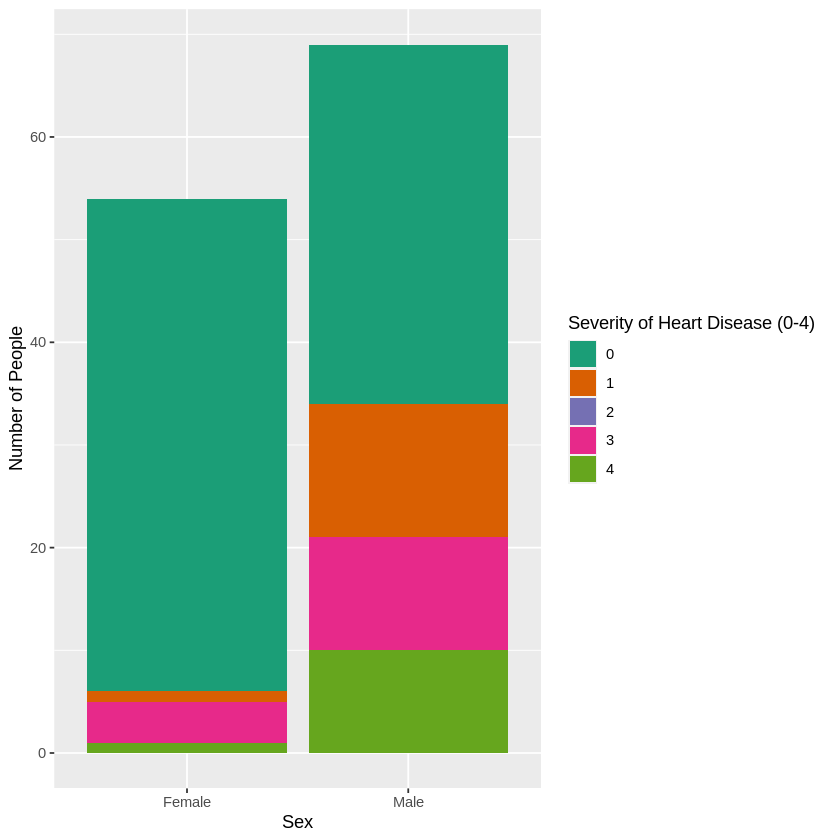

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



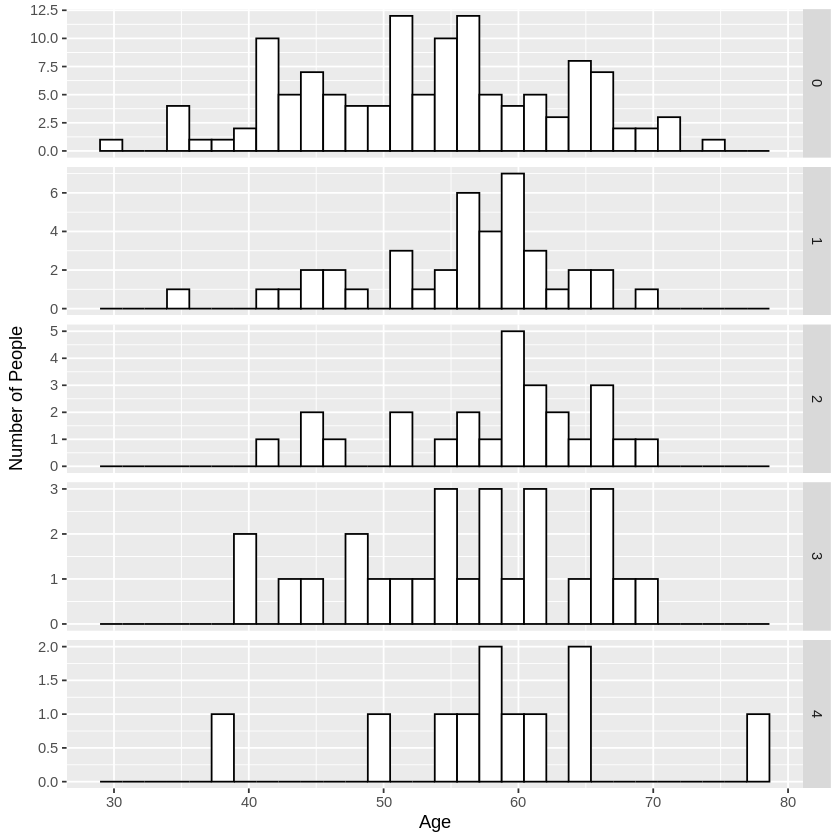

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



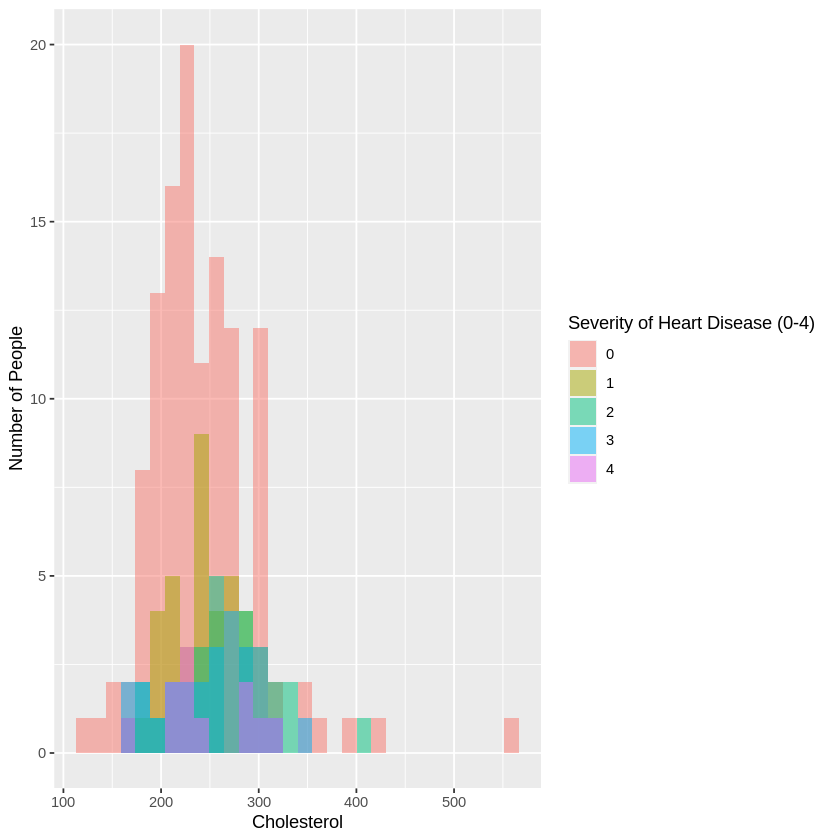

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



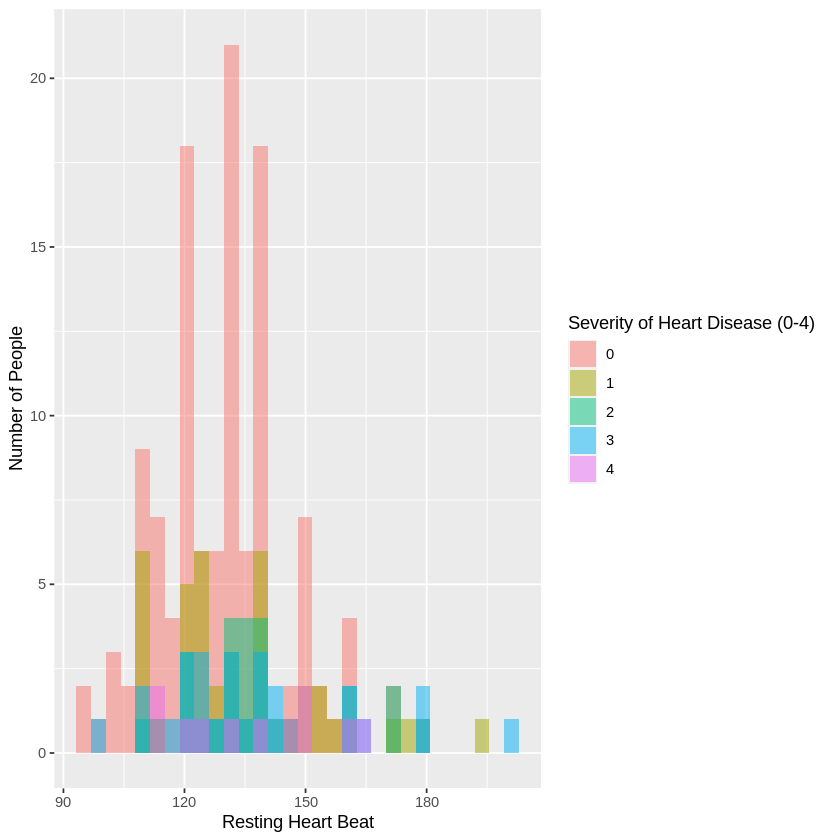

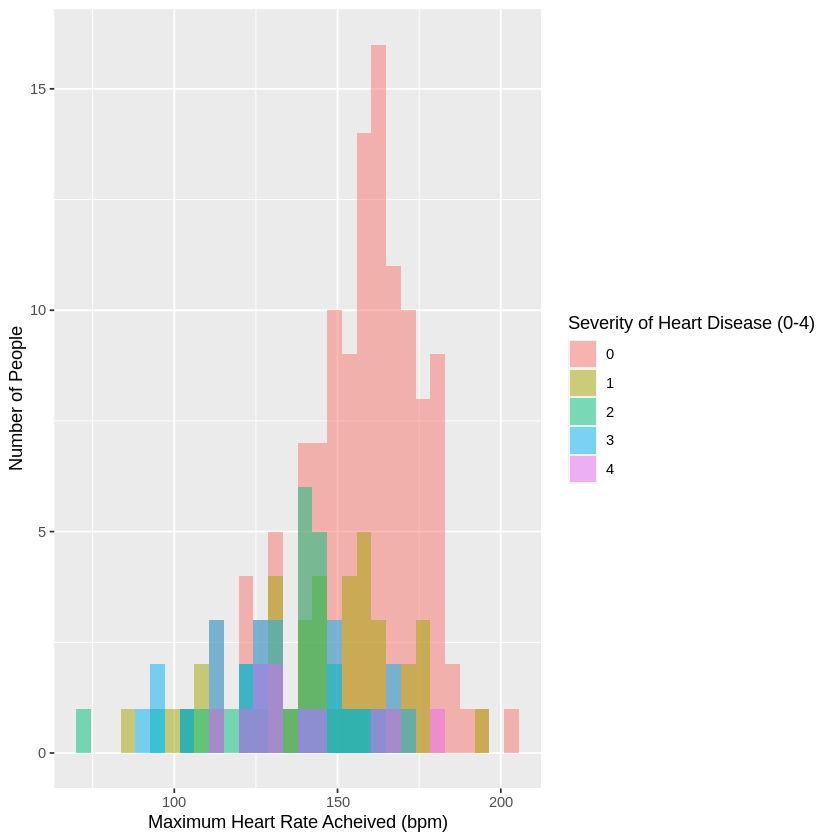

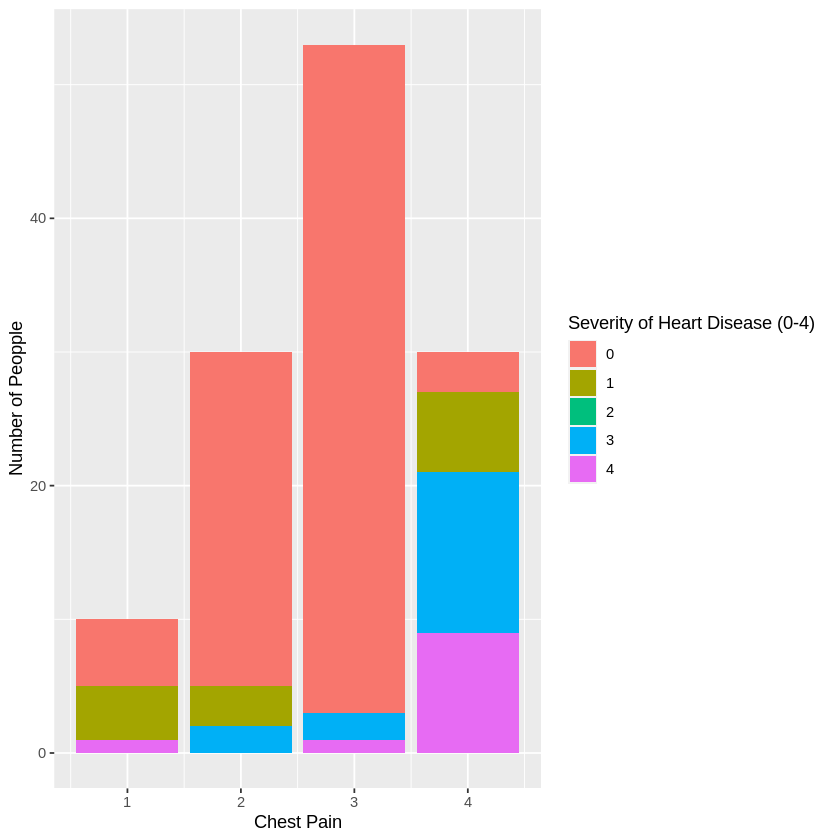

In [10]:
sex_bar_plot <- hd_training|>
         ggplot(aes(x = sex_edited, fill = num)) +
         geom_bar(position = "identity")+
         labs(x="Sex", y= "Number of People", fill = "Severity of Heart Disease (0-4)")
         
sex_bar_plot

age_hist_per_num <- ggplot(hd_training, aes(x = age))+
                    geom_histogram(fill = "white", color = "black")+
                    labs(x="Age", y="Number of People")+
                    facet_grid(num~., scales = "free")
age_hist_per_num

chol_hist <- ggplot(hd_training, aes(x = chol, fill = num))+
                    labs(x="Cholesterol", y="Number of People", fill="Severity of Heart Disease (0-4)")+
                    geom_histogram(alpha=0.5, position="identity")
                   
chol_hist

bp_hist <- ggplot(hd_training, aes(x = trestbps, fill = num))+
                    labs(x="Resting Heart Beat", y="Number of People", fill="Severity of Heart Disease (0-4)")+
                    geom_histogram(alpha=0.5, position="identity")
                   
bp_hist

max_hr_hist <-ggplot(hd_training, aes(x =thalach , fill = num))+
labs(x="Maximum Heart Rate Acheived (bpm)", y="Number of People", fill="Severity of Heart Disease (0-4)")+ 
geom_histogram(alpha=0.5, position="identity")

max_hr_hist

cp_bar<-hd_training|>
                ggplot(aes(x=cp, fill=num))+
                geom_bar(position="identity")+
                labs(x = "Chest Pain", y= "Number of Peopple", fill= "Severity of Heart Disease (0-4)")
cp_bar

Methods:
- By creating a histogram, the distribution of all columns/variables in our data set will be easier to interpret. This visualization will be especially crucial in determining what variables our group will choose to keep or remove from our data set. The bars that appear to have the largest contraction factor to heart disease will be the variables we choose for data analysis further into the project. 

Some of the variables in our dataset that we will be using include, but are not limited to: 
- Age 
- Sex 
- Cholesterol 
- Resting Blood Pressure
- Diagnosis of heart disease



Decsribe at least one way you will visualize the result:
- In our final model, we will use a variation of scatter plots and tables to communicate the predicted classification given via k-nearest neighbors. Scatterplots will be used to determine if two variables can be used to redact heart disease. Tables will be used to display predicted values aside actual values, we can then use this data to measure the accuracy of our model/classifier. 


Expected outcomes and significance:
- What do you expect to find?
    We expect that individuals who are older, have higher cholesterol, high blood pressure, high heart rates, etc. will be predicted to have heart disease, compared to those who are younger with more normal levels of cholesterol and heart rates, ect. 
- What impact could such findings have?
    It can allow for quicker diagnosis of heart disease and also help predict whether someone is at risk of heart disease, so they can start taking preventative measures to ensure they do not experience heart disease.
- What future questions could this lead to?
    What other disease could be predicted by looking at common symptoms and potential causes? 
    Is heart disease more prevalent in those with higher heart rates compared to lower heart rates? 